# Figures for the book text

## R2 and ROC side by side

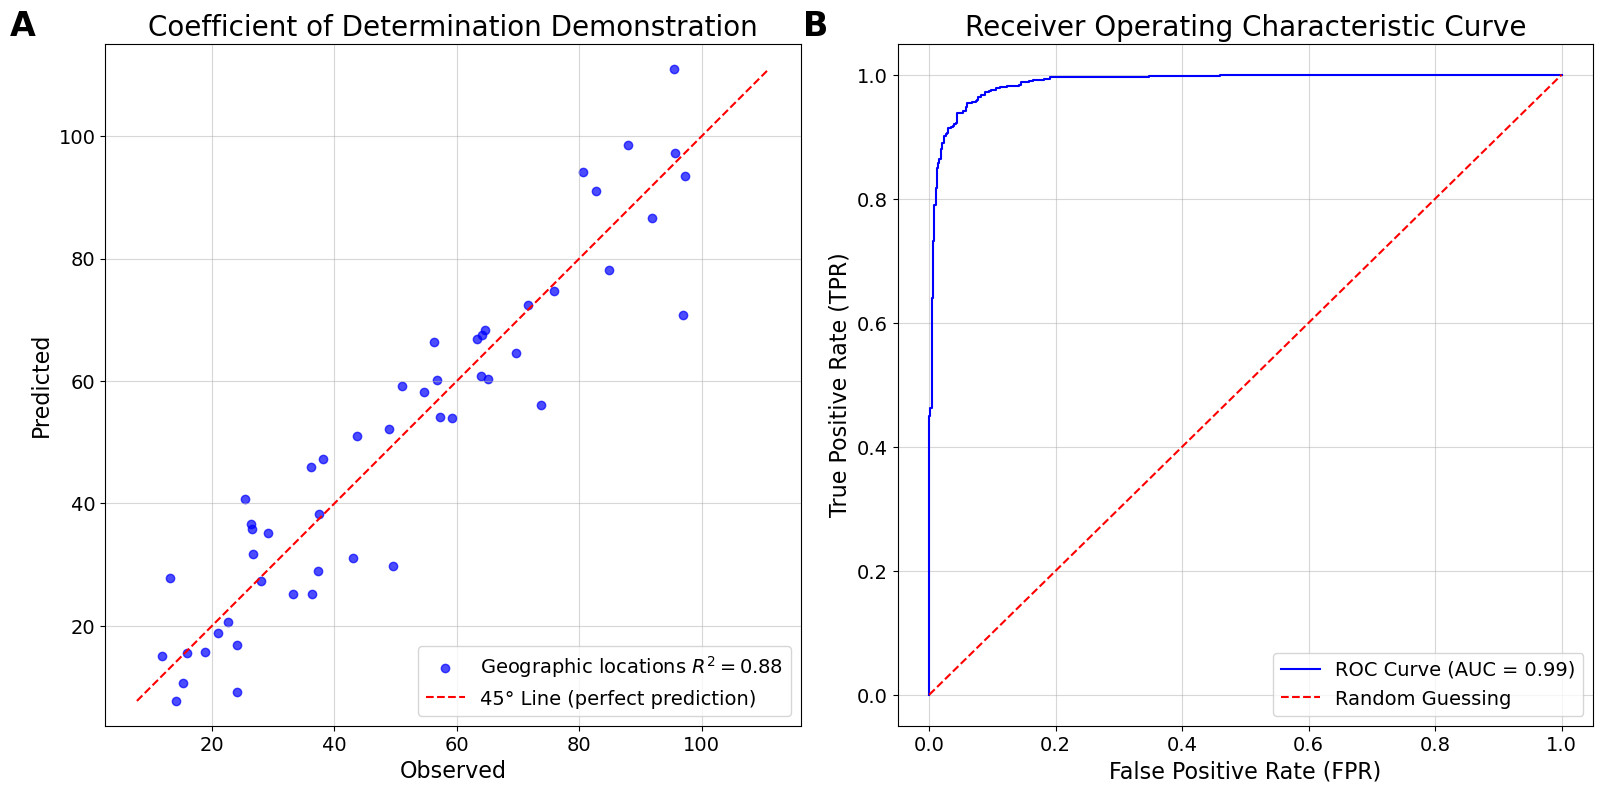

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, roc_curve, roc_auc_score

# Data for plot A
np.random.seed(42)
observed = np.random.uniform(10, 100, 50)
predicted = observed + np.random.normal(0, 10, 50)
r2 = r2_score(observed, predicted)
line = np.linspace(min(observed.min(), predicted.min()), max(observed.max(), predicted.max()), 100)

# Data for plot B
y_true = np.random.randint(0, 2, 1000)
y_scores = np.where(
    y_true == 1,
    np.random.normal(0.7, 0.1, 1000),
    np.random.normal(0.4, 0.1, 1000)
)
y_scores = np.clip(y_scores, 0, 1)
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
auc = roc_auc_score(y_true, y_scores)

# Define font sizes
title_fontsize = 20
label_fontsize = 16
tick_fontsize = 14
legend_fontsize = 14
subplot_label_fontsize = 24

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot A: R² Demonstration
axes[0].scatter(observed, predicted, color='blue', label=f'Geographic locations $R^2 = {r2:.2f}$', alpha=0.7)
axes[0].plot(line, line, color='red', linestyle='--', label='45° Line (perfect prediction)')
axes[0].set_xlabel('Observed', fontsize=label_fontsize)
axes[0].set_ylabel('Predicted', fontsize=label_fontsize)
axes[0].set_title('Coefficient of Determination Demonstration', fontsize=title_fontsize)
axes[0].legend(loc='lower right', fontsize=legend_fontsize)
axes[0].grid(alpha=0.5)
axes[0].axis('equal')

# Add subplot label 'A' to Plot A
axes[0].text(-0.1, 1.05, 'A', transform=axes[0].transAxes,
             fontsize=subplot_label_fontsize, fontweight='bold', va='top', ha='right')

# Increase tick label sizes for Plot A
axes[0].tick_params(axis='both', which='major', labelsize=tick_fontsize)

# Plot B: ROC Curve
axes[1].plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
axes[1].plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
axes[1].set_xlabel('False Positive Rate (FPR)', fontsize=label_fontsize)
axes[1].set_ylabel('True Positive Rate (TPR)', fontsize=label_fontsize)
axes[1].set_title('Receiver Operating Characteristic Curve', fontsize=title_fontsize)
axes[1].legend(fontsize=legend_fontsize)
axes[1].grid(alpha=0.5)

# Add subplot label 'B' to Plot B
axes[1].text(-0.1, 1.05, 'B', transform=axes[1].transAxes,
             fontsize=subplot_label_fontsize, fontweight='bold', va='top', ha='right')

# Increase tick label sizes for Plot B
axes[1].tick_params(axis='both', which='major', labelsize=tick_fontsize)

# Adjust layout and show the combined figure
plt.tight_layout()
# Save the figure to the 'images' folder
output_path = '../../images/R2_ROC_side_by_side_plots.png'
plt.savefig(output_path, dpi=300)
plt.show()